# Implementación del método descenso del gradiente

El método del descenso del gradiente es un algoritmo de optimización que permite converger hacia el valor mínimo de una función mediante un proceso iterativo. En aprendizaje automático básicamente se utiliza para minimizar una función que mide el error de predicción del modelo en el conjunto de datos. A esta función de error se le suele denominar función de coste e identificar con $J(\theta)$, en donde $\theta$ hace referencia a los parámetros del modelo.

## Importación de librerías

In [264]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])

## Creación de datos

**Generate some linear data, add some Gaussian noise to the data:**
 
    
$y=mx+b+n$ **where** $n$ is **gasussian noise**
    
$m= 3$ **and** $b= 4$ 

In [265]:
X = 2 * np.random.rand(100,1)
y = 4 +3 * X+np.random.randn(100,1)

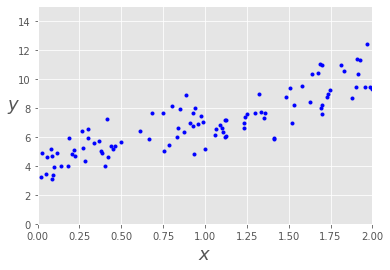

In [266]:
plt.plot(X,y,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

## Gradiente descendente (función de costo)

In [267]:
def  cal_cost(theta,X,y):
    '''
    
    Calculates the cost for given X and Y. The following shows and example of a single dimensional X
    theta = Vector of thetas 
    X     = Row of X's np.zeros((2,j))
    y     = Actual y's np.zeros((2,1))
    
    where:
        j is the no of features
    '''
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

## Gradiende descendente

## Gradiente descendente por mini lotes

#### Definición del algoritmo

In [268]:
def minibatch_gradient_descent(X,y,theta,learning_rate=0.01,iterations=10,batch_size =20):
    '''
    X    = Matrix of X without added bias units
    y    = Vector of Y
    theta=Vector of thetas np.random.randn(j,1)
    learning_rate 
    iterations = no of iterations
    
    Returns the final theta vector and array of cost history over no of iterations
    '''
    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)
    
    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        for i in range(0,m,batch_size):
            X_i = X[i:i+batch_size]
            y_i = y[i:i+batch_size]
            
            X_i = np.c_[np.ones(len(X_i)),X_i]
           
            prediction = np.dot(X_i,theta)

            theta = theta -(1/m)*learning_rate*( X_i.T.dot((prediction - y_i)))
            cost += cal_cost(theta,X_i,y_i)
        cost_history[it] = cost
        
    return theta, cost_history

#### Llamada al algoritmo

In [269]:
lr =0.1
n_iter = 200
theta = np.random.randn(2,1)
theta,cost_history = minibatch_gradient_descent(X,y,theta,lr,n_iter)
print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          4.065,
Theta1:          2.967
Final cost/MSE:  1066.366


#### Graficación

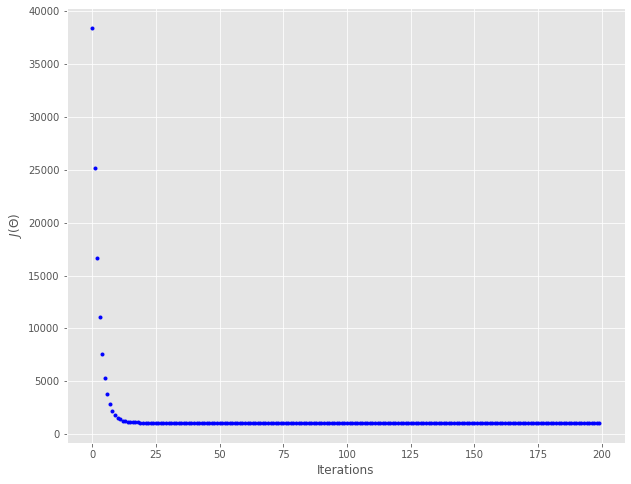

In [270]:
fig,ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('$J(\Theta)$',rotation=90)
ax.set_xlabel('Iterations')
theta = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')
plt.show()

## Gradiente descendente con momento

Descenso de gradiente es un método muy robusto y se mantiene aproximandose constantemente hacia un mínimo local. Este puede ser a su vez un problema:

- En caso de tener funciones de costo con muchas pequeñas oscilaciones, GD es propenso a ser atrapado en “malos minímos locales”.
- Si se esta muy lejos del óptimo y el tamaño de paso es pequeño, entonces GD tendrá una convergencia muy lenta

#### Definición de los algoritmos

In [271]:
def grad_quadratic(theta, f_params):
    '''
    Gradiente de la funcion de costo 
           sum_i (theta@x[i]-y[i])**2
    '''    
    X = f_params['X']
    y = f_params['y']

    err=theta[0]*X+theta[1]-y
    partial0=err
    partial1=X*partial0
    gradient= np.concatenate((partial1, partial0), axis=1)
    return np.sum(gradient, axis=1)


def grad_exp(theta, f_params):
    '''
    Gradiente de la funcion de costo 
           sum_i 1-exp(-k(theta@x[i]-y[i])**2)
    '''
    kappa= f_params['kappa']
    X    = f_params['X']
    y    = f_params['y']
    err=theta[0]*X+theta[1]-y
    partial0=err*np.exp(-kappa*err**2)
    partial1=X*partial0
    gradient= np.concatenate((partial1, partial0), axis=1)
    return np.mean(gradient, axis=0)


def GD(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso de gradiente
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   función que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                     nIter = gd_params[0] número de iteraciones
                     alpha = gd_params[1] tamaño de paso alpha

    f_params  :   lista de parametros para la funcion objetivo
                     kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                     X     = f_params['X'] Variable independiente
                     y     = f_params['y'] Variable dependiente                   
                  
    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    
    nIter = gd_params['nIter'] 
    alpha = gd_params['alpha']
    Theta=[]
    for t in range(nIter):
        p = grad(theta,f_params=f_params)
        theta = theta - alpha*p
        Theta.append(theta)
    return np.array(Theta)


def SGD(theta=[], grad=None, gd_params=[], f_params=[]):
    '''
    Descenso de gradiente estocástico
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      batch_size = gd_params['batch_size'] tamaño de la muestra
                      
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   
                  
    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    (high,dim) = f_params['X'].shape
    batch_size = gd_params['batch_size']
    
    nIter      = gd_params['nIter']
    alpha      = gd_params['alpha']
        
    Theta=[]
    for t in range(nIter):
        # Set of sampled indices
        smpIdx = np.random.randint(low=0, high=high, size=batch_size, dtype='int32')
        # sample 
        smpX = f_params['X'][smpIdx]
        smpy = f_params['y'][smpIdx]
        # parametros de la funcion objetivo
        smpf_params ={'kappa' : f_params['kappa'], 
                      'X'     : smpX , 
                      'y'     : smpy}
        
        p = grad(theta,f_params=smpf_params)
        theta = theta - alpha*p
        Theta.append(theta)
        
    return np.array(Theta)


def MGD(theta=[], grad=None, gd_params={}, f_params={}):
    '''
    Descenso de gradiente con momento (inercia)
    
    Parámetros
    -----------
    theta     :   condicion inicial
    grad      :   funcion que calcula el gradiente
    gd_params :   lista de parametros para el algoritmo de descenso, 
                      nIter = gd_params['nIter'] número de iteraciones
                      alpha = gd_params['alpha'] tamaño de paso alpha
                      eta   = gd_params['eta']  parametro de inercia (0,1]
    f_params  :   lista de parametros para la funcion objetivo, 
                      kappa = f_params['kappa'] parametro de escala (rechazo de outliers)
                      X     = f_params['X'] Variable independiente
                      y     = f_params['y'] Variable dependiente                   

    Regresa
    -----------
    Theta     :   trayectoria de los parametros
                     Theta[-1] es el valor alcanzado en la ultima iteracion
    '''
    nIter = gd_params['nIter']
    alpha = gd_params['alpha'] 
    eta   = gd_params['eta']
    p_old = np.zeros(theta.shape)
    Theta=[]
    for t in range(nIter):
        g = grad(theta, f_params=f_params)
        p = g + eta*p_old
        theta = theta - alpha*p
        p_old=p
        Theta.append(theta)
    return np.array(Theta)

#### Preparación de datos

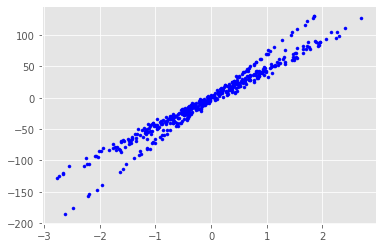

In [272]:
from sklearn import linear_model, datasets

n_samples = 500
X, y = datasets.make_regression(n_samples=n_samples,
                                n_features=1,
                                n_informative=2, 
                                noise=5,
                                random_state=0)
n_outliers=100
X[:n_outliers], y[:n_outliers] = datasets.make_regression(n_samples=n_outliers,
                                n_features=1,
                                n_informative=2, 
                                noise=2,
                                random_state=61)
y=np.expand_dims(y,axis=1)

plt.scatter(X[:],y[:], marker='.', c='#0000ff')
plt.show()

In [273]:
# condición inicial
theta = 10 * np.random.normal(size=2)

# parámetros del algoritmo
gd_params = {'alpha'          : 0.95, 
             'alphaADADELTA'  : 0.7,
             'alphaADAM'      : 0.95,
             'nIter'          : 300,
             'batch_size'     : 100,
             'eta'            : 0.9,
             'eta1'           : 0.9,
             'eta2'           : 0.999}

# parámetros de la función objetivo
f_params={'kappa' : 0.01, 
          'X'     : X , 
          'y'     : y}


#### Llamada a los algoritmos

In [274]:
# Gradiente descendente
ThetaGD = GD(theta=theta, grad=grad_exp, 
             gd_params=gd_params, f_params=f_params)
print('NORMAL      Inicio:', theta,'-> Fin:', ThetaGD[-1,:])

# Gradiente descendente estocástico
ThetaSGD = SGD(theta=theta, grad=grad_exp, 
               gd_params=gd_params, f_params=f_params)
print('ESTOCASTICO Inicio:', theta,'-> Fin:', ThetaSGD[-1,:])

# Gradiente descendente con momento
ThetaMGD = MGD(theta=theta, grad=grad_exp, 
               gd_params=gd_params, f_params=f_params)
print('MOMENTO     Inicio:', theta,'-> Fin:', ThetaMGD[-1,:])

NORMAL      Inicio: [-3.57274167 28.2261746 ] -> Fin: [45.67020876 -0.27659597]
ESTOCASTICO Inicio: [-3.57274167 28.2261746 ] -> Fin: [45.19874893  0.10838833]
MOMENTO     Inicio: [-3.57274167 28.2261746 ] -> Fin: [45.67021963 -0.27658825]


#### Graficación

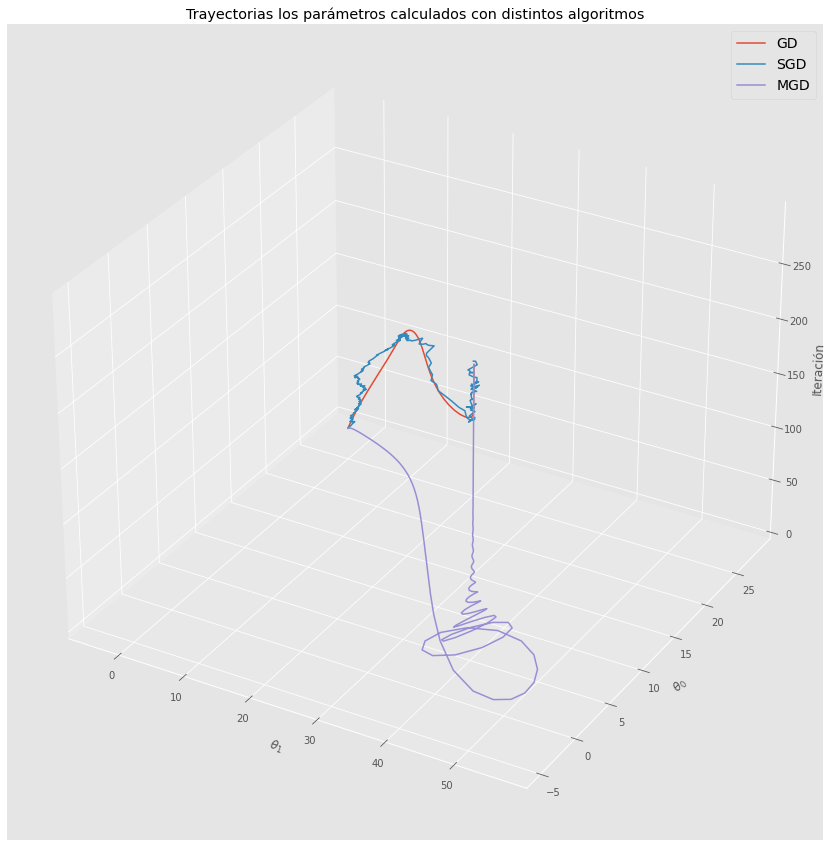

In [277]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rcParams['legend.fontsize'] = 14

fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')
nIter=np.expand_dims(np.arange(ThetaGD.shape[0]),1) 
Tmax=200
Tmax=2000

#ax.scatter(X[:], y[:], marker='.', label='points')
ax.plot(ThetaGD[:Tmax,0],  ThetaGD [:Tmax,1], nIter[:Tmax,0], label='GD')
ax.plot(ThetaSGD[:Tmax,0], ThetaSGD[:Tmax,1], nIter[:Tmax,0], label='SGD')
ax.plot(ThetaMGD[:Tmax,0], ThetaMGD[:Tmax,1], nIter[:Tmax,0], label='MGD')
ax.legend()
ax.set_title(r'Trayectorias los parámetros calculados con distintos algoritmos')
ax.set_xlabel(r'$\theta_1$')
ax.set_ylabel(r'$\theta_0$')
ax.set_zlabel('Iteración')

plt.show()